In [2]:
##import the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [151]:
pwd

'C:\\Users\\fatem'

In [20]:
##load the data
df_gog=pd.read_csv(r'C:\\Users\\fatem\\dataset\\googleplaystore.csv')

In [21]:
df_gog.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [7]:
df_gog.shape

(10841, 13)

In [8]:
df_gog.tail()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [9]:
df_gog.describe(include='all')

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
count,10841,10841,9367.000000,10841,10841,10841,10840,10841,10840,10841,10841,10833,10838
unique,9660,34,NaN,6002,462,22,3,93,6,120,1378,2832,33
top,ROBLOX,FAMILY,NaN,0,Varies with device,"1,000,000+",Free,0,Everyone,Tools,"August 3, 2018",Varies with device,4.1 and up
freq,9,1972,NaN,596,1695,1579,10039,10040,8714,842,326,1459,2451
mean,NaN,NaN,4.193338,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,0.537431,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,4.300000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,4.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Statistical Summery:

1.Unique apps are 9660 out of 10841 which means there are 1181 duplicate values in apps column.<br>
2.Apps are divide into 34 unique category of apps with 120 unique genres.<br>
3.Average rating: 4.19, minimum rating: 1,while avg 1st quartile ratings is 4 and avg 3rd quartile is 4.50 with maximum valus of 19.<br>
4.Out of 10841,10039  apps are free to install.<br>


In [10]:

df_gog.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

Columns like Reviews,Installs and Price contains numeric data but are in object form

# Data cleaning:

In [580]:
##Dealing with duplicate values:
df_gog.drop_duplicates(keep='first',inplace=True)
df_gog.shape

(10358, 13)

In [75]:
#check for null values
df_gog.isnull().sum()

App                  0
Category             0
Rating            1465
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [22]:
#drop the null values of content rating:
df_gog.dropna(subset=['Content Rating'],axis=0,inplace=True)
df_gog.reset_index(drop=True,inplace=True)

In [23]:
#replace the null values of rating with mean category wise 
df_gog['Rating']=df_gog.groupby('Category')['Rating'].transform(lambda grp:grp.fillna(np.mean(grp)))


In [24]:
df_gog['Rating']=df_gog['Rating'].round(2)

In [25]:
df_gog[(df_gog['Type'].isnull())]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
9148,Command & Conquer: Rivals,FAMILY,4.19,0,Varies with device,0,NaN,0,Everyone 10+,Strategy,"June 28, 2018",Varies with device,Varies with device


We will replace the null type with free as its price is 0.

In [26]:
df_gog['Type'].replace(np.nan,'Free',inplace=True)

In [27]:
df_gog['Current Ver'].describe()

count                  10832
unique                  2831
top       Varies with device
freq                    1459
Name: Current Ver, dtype: object

In [28]:
##top value of current ver is 'varies with device', lets replace the nan value of the column with it.
df_gog['Current Ver'].replace(np.nan,'Varies with device',inplace=True)

In [29]:
df_gog['Android Ver'].describe()

count          10838
unique            33
top       4.1 and up
freq            2451
Name: Android Ver, dtype: object

In [30]:
##replace nan values of android ver with '4.1 and up'.
df_gog['Android Ver'].replace(np.nan,'4.1 and up',inplace=True)

In [31]:
df_gog.shape

(10840, 13)

In [32]:
df_gog.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [33]:
##Size column has sizes in Kb as well as Mb. To analyze, we need to convert these to numeric.
df_gog['Size'].value_counts()

Varies with device    1695
11M                    198
12M                    196
14M                    194
13M                    191
                      ... 
378k                     1
613k                     1
676k                     1
14k                      1
376k                     1
Name: Size, Length: 461, dtype: int64

In [34]:
df_gog['Size'].replace('Varies with device',np.nan,inplace=True)


In [35]:
df_gog.dropna(subset=['Size'],axis=0,inplace=True)
df_gog.reset_index(drop=True,inplace=True)

In [36]:
df_gog['Size'].value_counts()

11M     198
12M     196
14M     194
13M     191
15M     184
       ... 
511k      1
420k      1
720k      1
41k       1
853k      1
Name: Size, Length: 460, dtype: int64

In [37]:
df_gog['Right']=df_gog['Size'].str[-1]

In [38]:
split=df_gog['Size'].str.split('M')


In [39]:
df_gog['Size']=split.str[0]

In [40]:
split1=df_gog['Size'].str.split('k')


In [41]:
df_gog['Size']=split1.str[0]

In [42]:
df_gog['Size']=df_gog['Size'].astype('float')

In [43]:
subset=df_gog.loc[df_gog['Right']=='M',['Size']]*1000


In [44]:
subset1=df_gog.loc[df_gog['Right']=='k',['Size']]


In [45]:
df_gog['Size']=pd.concat([subset,subset1])

In [46]:
df_gog.drop(['Right'],axis=1,inplace=True)

In [47]:
df_gog.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [48]:
### Price field is a string and has $ symbol. Remove ‘$’ sign, and convert it to numeric.
df_gog['Price']=df_gog['Price'].apply(lambda x:str(x).replace('$',''))
df_gog['Price']=df_gog['Price'].apply(lambda x:float(x))

In [49]:
df_gog['Price'].unique()

array([  0.  ,   4.99,   6.99,   1.49,   2.99,   3.99,   7.99,   5.99,
         1.99,   9.99,   0.99,   9.  ,   5.49,  10.  ,  24.99,  11.99,
        79.99,  16.99,  14.99,   1.  ,  29.99,  12.99,   3.49,  10.99,
         7.49,   1.5 ,  19.99,  15.99,  33.99,  74.99,  39.99,   2.49,
         4.49,   1.7 ,   2.  ,   3.88,  25.99, 399.99,  17.99, 400.  ,
         3.02,   1.76,   4.84,   4.77,   1.61,   1.59,   6.49,   1.29,
         5.  ,  13.99, 299.99, 379.99,  37.99,  18.99, 389.99,  19.9 ,
         8.49,   1.75,  14.  ,   4.85,  46.99, 109.99, 154.99,   3.08,
         2.59,   4.8 ,   8.99,   1.96,  19.4 ,  15.46,   3.04,   4.29,
         2.6 ,   3.28,   4.6 ,  28.99,   2.9 ,   1.97, 200.  ,  89.99,
         2.56,  30.99,   3.61, 394.99,   1.26,   1.2 ,   1.04])

In [50]:
##Installs field is currently stored as string and has values like 1,000,000+. 
df_gog['Installs'].value_counts()

1,000,000+        1303
100,000+          1054
10,000+           1011
1,000+             873
10,000,000+        825
100+               702
5,000,000+         535
500,000+           492
5,000+             461
50,000+            446
10+                376
500+               322
100,000,000+       201
50+                201
50,000,000+        147
5+                  78
1+                  64
500,000,000+        30
0+                  14
1,000,000,000+      10
Name: Installs, dtype: int64

In [52]:
df_gog['Installs']=df_gog['Installs'].replace('[\+\,]','',regex=True).astype('int')


In [53]:
##Reviews is a numeric field that is loaded as a string field. Convert it to numeric (int/float).
df_gog['Reviews']=pd.to_numeric(df_gog['Reviews'])

In [54]:
df_gog.dtypes

App                object
Category           object
Rating            float64
Reviews             int64
Size              float64
Installs            int32
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [55]:
df_gog.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9145 entries, 0 to 9144
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9145 non-null   object 
 1   Category        9145 non-null   object 
 2   Rating          9145 non-null   float64
 3   Reviews         9145 non-null   int64  
 4   Size            9145 non-null   float64
 5   Installs        9145 non-null   int32  
 6   Type            9145 non-null   object 
 7   Price           9145 non-null   float64
 8   Content Rating  9145 non-null   object 
 9   Genres          9145 non-null   object 
 10  Last Updated    9145 non-null   object 
 11  Current Ver     9145 non-null   object 
 12  Android Ver     9145 non-null   object 
dtypes: float64(3), int32(1), int64(1), object(8)
memory usage: 893.2+ KB


# Sanity Checks:

In [612]:
##Average rating should be between 1 and 5 as only these values are allowed on the play store. 
#Drop the rows that have a value outside this range.
df_gog[(df_gog['Rating']>5)|(df_gog['Rating']<1)].shape

(0, 13)

In [56]:
##Reviews should not be more than installs as only those who installed can review the app. 
##If there are any such records, drop them.
df_gog[(df_gog['Reviews']>df_gog['Installs'])].shape

(10, 13)

In [57]:
np.where(df_gog['Reviews']>df_gog['Installs'])

(array([1901, 3384, 4486, 4583, 5127, 5303, 5958, 7068, 7531, 9008],
       dtype=int64),)

In [58]:
df_gog.drop([1704, 3089, 4190, 4287, 4829, 4998, 5650, 6758, 7219, 8695],inplace=True,axis=0)

In [59]:
##For free apps (type = “Free”), the price should not be >0. Drop any such rows.
df_gog[(df_gog['Type']=='Free')&(df_gog['Price']!=0)].shape

(0, 13)

In [60]:
df_gog.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9135 entries, 0 to 9144
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9135 non-null   object 
 1   Category        9135 non-null   object 
 2   Rating          9135 non-null   float64
 3   Reviews         9135 non-null   int64  
 4   Size            9135 non-null   float64
 5   Installs        9135 non-null   int32  
 6   Type            9135 non-null   object 
 7   Price           9135 non-null   float64
 8   Content Rating  9135 non-null   object 
 9   Genres          9135 non-null   object 
 10  Last Updated    9135 non-null   object 
 11  Current Ver     9135 non-null   object 
 12  Android Ver     9135 non-null   object 
dtypes: float64(3), int32(1), int64(1), object(8)
memory usage: 963.5+ KB


In [61]:
df_gog.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [62]:
df_gog.to_csv(r'C:\\Users\\fatem\\dataset\\clean_gooleplaystore.csv',index=False)

# Univariate Analysis

In [63]:
df_gog=pd.read_csv(r'C:\\Users\\fatem\\dataset\\clean_gooleplaystore.csv')

Price

Text(0.5, 1.0, 'Price univariate analysis')

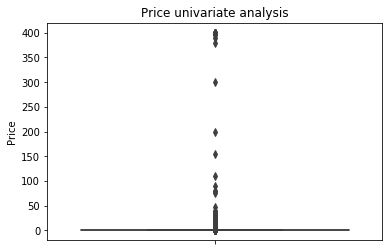

In [73]:
sns.boxplot(data=df_gog,y='Price');
plt.title('Price univariate analysis')

NOTE: We can see that median and mean in this plot is same which is 0 because
Free apps are very as compared to the paid applications,hence making other data points  outliers
Therefore we will only look at the price of paid appliacation

Text(0.5, 1.0, 'Price-paid univariate analysis')

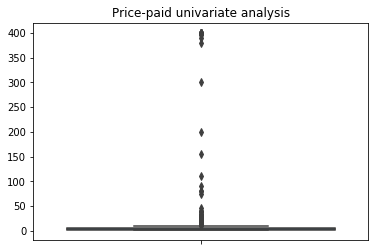

In [65]:
sns.boxplot(data=df_gog,y=df_gog.loc[(df_gog['Type']=='Paid')&(df_gog['Price']>0),['Price']]);

plt.title('Price-paid univariate analysis')


Almost 80% of the apps are in the range of 1 dollar to 70 dollars.

In [66]:
print(df_gog['Price' ].skew())
df_gog['Price'].describe()

21.771956243828967


count    9135.000000
mean        1.185663
std        17.365208
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       400.000000
Name: Price, dtype: float64

The skewness value of 21.53 shows that the variable 'Price' has a right-skewed distribution, 
indicating the presence of extreme higher values.The maximum 'Price' value of 400 proves this point.

Reviews

Text(0.5, 1.0, 'Price univariate analysis')

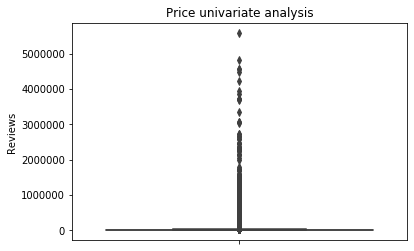

In [85]:
sns.boxplot(data=df_gog,y='Reviews');
plt.title('Price univariate analysis')

In [86]:
print(df_gog['Price' ].skew())
df_gog['Price'].describe()

27.90781155263415


count    8877.000000
mean        0.469324
std         4.011709
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       200.000000
Name: Price, dtype: float64

There are apps with very high number of reviews.

Rating

Text(0.5, 1.0, 'Rating univariate analysis')

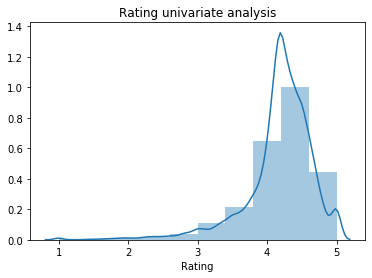

In [69]:
sns.distplot(df_gog['Rating'],kde=True,hist=True,bins=10);
plt.title('Rating univariate analysis')

In [70]:
print(df_gog['Rating' ].skew())
df_gog['Rating'].describe()

-1.8954583136701484


count    9135.000000
mean        4.175029
std         0.502129
min         1.000000
25%         4.000000
50%         4.200000
75%         4.500000
max         5.000000
Name: Rating, dtype: float64

Rating is left skewed(negative skew),median is 4.3 from descriptive analysis. Most of the apps have higher ratings above 4.0

Size

Text(0.5, 1.0, 'Size univariate analysis')

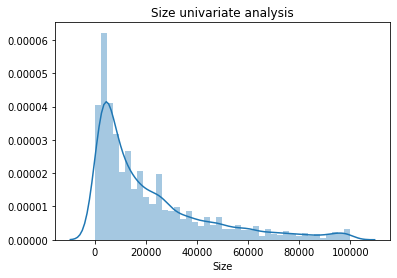

In [71]:
Size=df_gog['Size']
sns.distplot(Size,kde=True,hist=True);
plt.title('Size univariate analysis')

In [72]:
print(df_gog['Size' ].skew())
df_gog['Size'].describe()

1.5587729747139223


count      9135.000000
mean      21509.486864
std       22588.374691
min           8.500000
25%        4900.000000
50%       13000.000000
75%       30000.000000
max      100000.000000
Name: Size, dtype: float64

The distribution is right skewed with skew score of 1.44 showing most of the apps are ligher in size.

# Outlier Treatment:

Price:

In [75]:
##From the box plot, it seems like there are some apps with very high price. 
##A price of $200 for an application on the Play Store is very high and suspicious!
z=np.abs(stats.zscore(df_gog['Price']))
threshold=3
outlier_price=df_gog.loc[(z>3)]
outlier_price

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1716,Vargo Anesthesia Mega App,MEDICAL,4.60,92,32000.0,1000,Paid,79.99,Everyone,Medical,"June 18, 2018",19.0,4.0.3 and up
1815,Vargo Anesthesia Mega App,MEDICAL,4.60,92,32000.0,1000,Paid,79.99,Everyone,Medical,"June 18, 2018",19.0,4.0.3 and up
1839,Language Therapy: Aphasia,MEDICAL,4.19,10,28000.0,1000,Paid,74.99,Everyone,Medical,"June 25, 2018",3.1.1,4.0.3 and up
3068,most expensive app (H),FAMILY,4.30,6,1500.0,100,Paid,399.99,Everyone,Entertainment,"July 16, 2018",1.0,7.0 and up
3208,💎 I'm rich,LIFESTYLE,3.80,718,26000.0,10000,Paid,399.99,Everyone,Lifestyle,"March 11, 2018",1.0.0,4.4 and up
3212,I'm Rich - Trump Edition,LIFESTYLE,3.60,275,7300.0,10000,Paid,400.00,Everyone,Lifestyle,"May 3, 2018",1.0.1,4.1 and up
4088,I am rich,LIFESTYLE,3.80,3547,1800.0,100000,Paid,399.99,Everyone,Lifestyle,"January 12, 2018",2.0,4.0.3 and up
4091,I am Rich Plus,FAMILY,4.00,856,8700.0,10000,Paid,399.99,Everyone,Entertainment,"May 19, 2018",3.0,4.4 and up
4092,I am rich VIP,LIFESTYLE,3.80,411,2600.0,10000,Paid,299.99,Everyone,Lifestyle,"July 21, 2018",1.1.1,4.3 and up
4093,I Am Rich Premium,FINANCE,4.10,1867,4700.0,50000,Paid,399.99,Everyone,Finance,"November 12, 2017",1.6,4.0 and up


There are very few apps with the price above 200$.After looking these apps on google app it turns out their developer keep changing the prices and the apps are there to show others you are rich.

In [76]:
##Lets drop these as most seem to be junk apps
df_gog=df_gog[(df_gog['Price']<=200)]

In [77]:
df_gog.shape

(9118, 13)

Reviews:

In [78]:
##Very few apps have very high number of reviews.
df_gog.loc[(df_gog['Reviews']>2_000_000),['App']]

,App
266,Yahoo Mail – Stay Organized
268,imo free video calls and chat
277,UC Browser Mini -Tiny Fast Private & Secure
282,UC Browser - Fast Download Private & Secure
285,imo free video calls and chat
...,...
7566,Need for Speed™ No Limits
7587,Modern Combat 5: eSports FPS
8513,Farm Heroes Saga
8517,Fallout Shelter


In [625]:
####These are all star apps that don’t help with the analysis and, in fact, will skew it. 
##Drop records having more than 2 million reviews.
df_gog.drop(df_gog[df_gog['Reviews'] >2000000].index, inplace=True)

Installs:

In [79]:
##There seems to be some outliers in this field too. 

df_gog['Installs'].quantile([0.10,0.25,0.50,0.70,0.90,0.95,0.99])


0.10          100.0
0.25         1000.0
0.50       100000.0
0.70      1000000.0
0.90     10000000.0
0.95     10000000.0
0.99    100000000.0
Name: Installs, dtype: float64

In [80]:
##Decide a threshold as cutoff for outlier 
z=np.abs(stats.zscore(df_gog['Installs']))
threshold=3 
outlier_installs=df_gog.loc[(z>3)]
outlier_installs

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
268,imo free video calls and chat,COMMUNICATION,4.3,4785892,11000.0,500000000,Free,0.0,Everyone,Communication,"June 8, 2018",9.8.000000010501,4.0 and up
282,UC Browser - Fast Download Private & Secure,COMMUNICATION,4.5,17712922,40000.0,500000000,Free,0.0,Teen,Communication,"August 2, 2018",12.8.5.1121,4.0 and up
285,imo free video calls and chat,COMMUNICATION,4.3,4785988,11000.0,500000000,Free,0.0,Everyone,Communication,"June 8, 2018",9.8.000000010501,4.0 and up
299,UC Browser - Fast Download Private & Secure,COMMUNICATION,4.5,17714850,40000.0,500000000,Free,0.0,Teen,Communication,"August 2, 2018",12.8.5.1121,4.0 and up
330,imo free video calls and chat,COMMUNICATION,4.3,4785988,11000.0,500000000,Free,0.0,Everyone,Communication,"June 8, 2018",9.8.000000010501,4.0 and up
1221,Subway Surfers,GAME,4.5,27722264,76000.0,1000000000,Free,0.0,Everyone 10+,Arcade,"July 12, 2018",1.90.0,4.1 and up
1222,Candy Crush Saga,GAME,4.4,22426677,74000.0,500000000,Free,0.0,Everyone,Casual,"July 5, 2018",1.129.0.2,4.1 and up
1227,Temple Run 2,GAME,4.3,8118609,62000.0,500000000,Free,0.0,Everyone,Action,"July 5, 2018",1.49.1,4.0 and up
1228,Pou,GAME,4.3,10485308,24000.0,500000000,Free,0.0,Everyone,Casual,"May 25, 2018",1.4.77,4.0 and up
1257,Subway Surfers,GAME,4.5,27723193,76000.0,1000000000,Free,0.0,Everyone 10+,Arcade,"July 12, 2018",1.90.0,4.1 and up


In [81]:
##Apps having very high number of installs should be dropped from the analysis.
df_gog.drop(df_gog[df_gog['Installs'] >50000000.0].index, inplace=True)

# Bivariate Analysis:

Let’s look at how the available predictors relate to the variable of interest, i.e., our target variable rating. Make scatter plots (for numeric features) and box plots (for character features) to assess the relations between rating and the other features.

In [82]:
##find the correaltion between the variables
df_gog.corr()

,Rating,Reviews,Size,Installs,Price
Rating,1.000000,0.113376,0.062287,0.086781,0.015753
Reviews,0.113376,1.000000,0.221080,0.728959,-0.027653
Size,0.062287,0.221080,1.000000,0.207911,-0.006822
Installs,0.086781,0.728959,0.207911,1.000000,-0.037644
Price,0.015753,-0.027653,-0.006822,-0.037644,1.000000


Text(0.5, 1, 'Correlation between the variables')

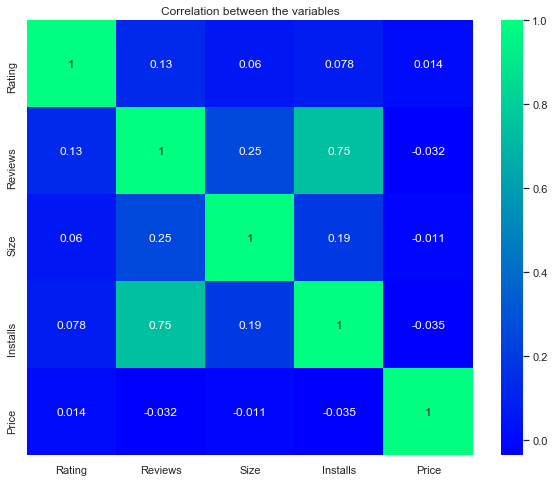

In [677]:
sns.set(rc={'figure.figsize':(10,8)})
sns.heatmap(df_gog.corr(),annot=True,cmap='winter') 
plt.title('Correlation between the variables')

Installs vs Reviews

Text(0.5, 1.0, 'Installs vs Reviews bivariate analysis')

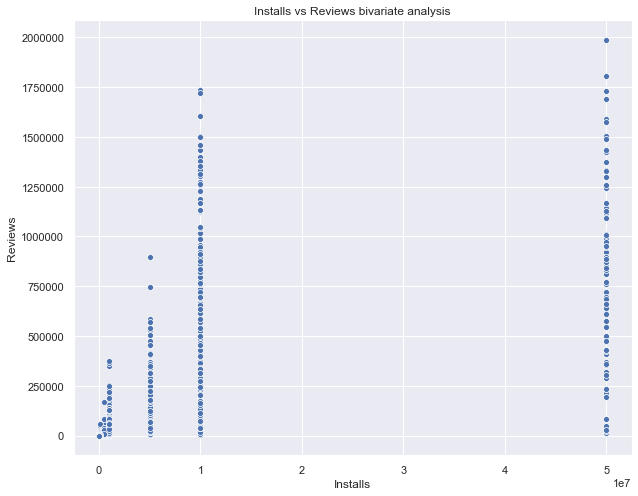

In [678]:
### As installs has the highest correlation with Reviews:
sns.scatterplot(x='Installs',y='Reviews',data=df_gog);
plt.title('Installs vs Reviews bivariate analysis')

The Installs and Reviews seem to be moderately correalted(0.75).This relation ship could explain why more populer categories have more installs and more reviews.We can use only one of the two for model.

Rating vs. Price

Text(0.5, 1.0, 'Price vs Rating')

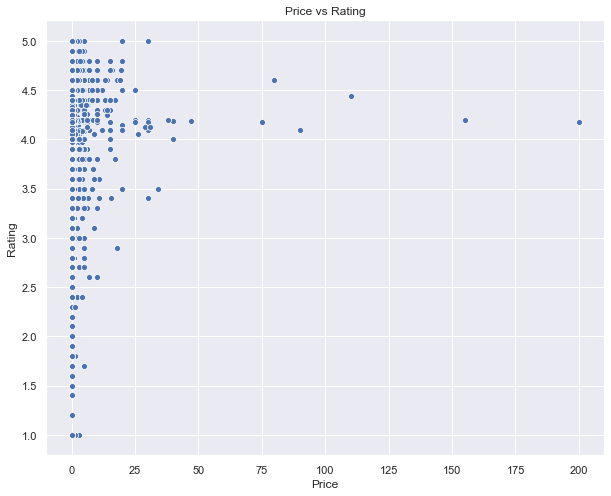

In [337]:
sns.scatterplot(x='Price',y='Rating',data=df_gog);
plt.title('Price vs Rating bivariate analysis')

Free apps  have the range of ranting between 1 to 5.While paid apps semms to have almost higher rating.There sems no pattern here.

Text(0.5, 1.0, 'Size vs Rating')

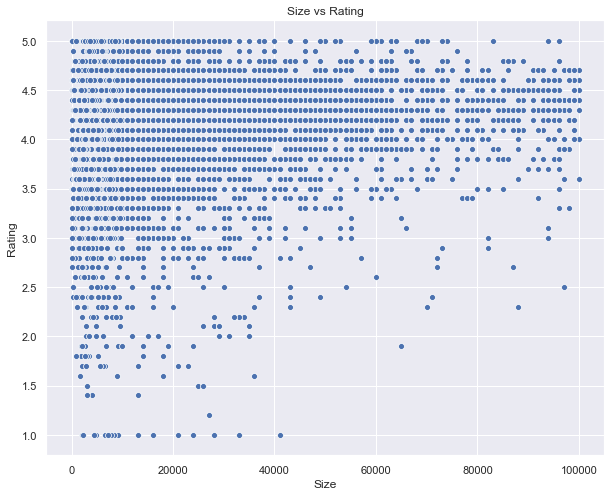

In [284]:
sns.scatterplot(x='Size',y='Rating',data=df_gog);
plt.title('Size vs Rating bivariate analysis')


Most top rated apps are optimalle sized between 2000k to 40000k neither too light nor too heavy.
bulky apps are fairly high rated indicating they are bulky for a purpose.

Text(0.5, 1.0, 'Reviews vs Rating')

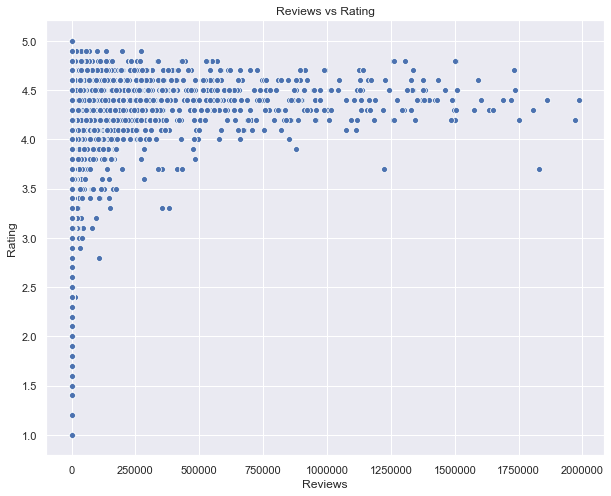

In [285]:
sns.scatterplot(x='Reviews',y='Rating',data=df_gog)
plt.title('Reviews vs Rating bivariate analysis')

The higher rated apps have more reviews than lower rated apps. Some of the higher rated apps have significantly more reviews than others. This could be caused through in-app pop ups or in-app incentives.

Text(0.5, 1.0, 'Content Rating vs Rating bivariate analysis')

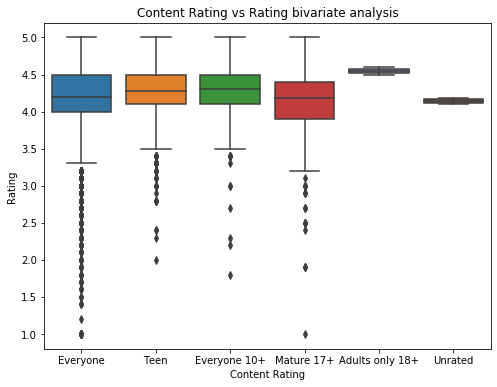

In [83]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_gog,x='Content Rating',y='Rating');
plt.title('Content Rating vs Rating bivariate analysis')

The content Rting does not really affect the rating despite most apps being in the Everyone category.

Text(0.5, 1.0, 'Category vs Rating bivariate analysis')

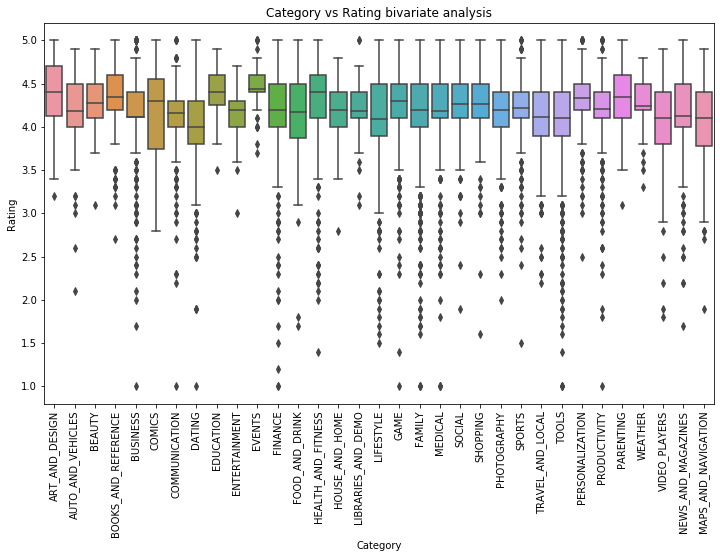

In [84]:
plt.figure(figsize=(12, 7))
sns.boxplot(data=df_gog,x='Category',y='Rating');
plt.xticks(rotation=90)
plt.title('Category vs Rating bivariate analysis')

The categories with the highest range of ratings are Art & Design,Events,and Parenting.
The Dating category has the lowest range of ratings.Almost all the categories has median rating between 4.0 to 4.5.

In [87]:
df_gog.to_csv(r'C:\\Users\\fatem\\dataset\\treated_gooleplaystore.csv',index=False)

# Data Processing:

In [108]:
df=pd.read_csv(r'C:\\Users\\fatem\\dataset\\treated_gooleplaystore.csv')

For the categorial column,i converted each category into an invidiual number. in the later section when we do apply machine learning, two methods will be applied to the code, being integer encoding and one-hot encoding aka dummy variables. This is because integer encoding relies on the fact that there is a relationshio between each category to provide better predictive accuracy.


In [109]:
## cleaning categories into integers
categorystring=df['Category']
categoryval=df['Category'].unique()
categoryvalcount=len(categoryval)
category_dict={}
for i in range(0,categoryvalcount):
    category_dict[categoryval[i]]=i
df['Category_c']=df['Category'].map(category_dict).astype(int)

In [110]:
### converting type classification into binary
def type_cat(types):
    if types=='Free':
        return 0
    else:
        return 1
    
df['Type']=df['Type'].map(type_cat)

In [111]:
#cleaning of content rating classification
Rating_list=df['Content Rating'].unique()
Rating_dict={}
for i in range(len(Rating_list)):
    Rating_dict [Rating_list[i]]=i
    
df['Content Rating']=df['Content Rating'].map(Rating_dict).astype(int)

In [112]:
#dropping of unrelated and unnecessary items
df.drop(['App','Last Updated', 'Current Ver', 'Android Ver'],axis=1,inplace=True)

In [113]:
#cleaning of genres
Genres_list=df.Genres.unique()
Genres_dict={}
for i in range(len(Genres_list)):
    Genres_dict[Genres_list[i]]=i
    
df['Genres_c']=df['Genres'].map(Genres_dict).astype(int)

In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8877 entries, 0 to 8876
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Category        8877 non-null   object 
 1   Rating          8877 non-null   float64
 2   Reviews         8877 non-null   int64  
 3   Size            8877 non-null   float64
 4   Installs        8877 non-null   int64  
 5   Type            8877 non-null   int64  
 6   Price           8877 non-null   float64
 7   Content Rating  8877 non-null   int32  
 8   Genres          8877 non-null   object 
 9   Category_c      8877 non-null   int32  
 10  Genres_c        8877 non-null   int32  
dtypes: float64(3), int32(3), int64(3), object(2)
memory usage: 659.0+ KB


Creating another dataframe that specifically creates dummy variables for each categorical instance in the dataframe.

In [115]:
#for dummy variables encoding for categories
df2=pd.get_dummies(df,columns=['Category'])

In [101]:
df2.head()

,App,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,...,Category_PERSONALIZATION,Category_PHOTOGRAPHY,Category_PRODUCTIVITY,Category_SHOPPING,Category_SOCIAL,Category_SPORTS,Category_TOOLS,Category_TRAVEL_AND_LOCAL,Category_VIDEO_PLAYERS,Category_WEATHER
0,Photo Editor & Candy Camera & Grid & ScrapBook,4.1,159,19000.0,10000,1,0.0,0,0,"January 7, 2018",...,0,0,0,0,0,0,0,0,0,0
1,Coloring book moana,3.9,967,14000.0,500000,1,0.0,0,1,"January 15, 2018",...,0,0,0,0,0,0,0,0,0,0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",4.7,87510,8700.0,5000000,1,0.0,0,0,"August 1, 2018",...,0,0,0,0,0,0,0,0,0,0
3,Sketch - Draw & Paint,4.5,215644,25000.0,50000000,1,0.0,1,0,"June 8, 2018",...,0,0,0,0,0,0,0,0,0,0
4,Pixel Draw - Number Art Coloring Book,4.3,967,2800.0,100000,1,0.0,0,2,"June 20, 2018",...,0,0,0,0,0,0,0,0,0,0


I chose 2 most common models i.e linear regression and randome forst regressor. We will technically run 4 regressions for each model used as we consider one-hot vs integer encoded results for the category section,as well as including/excluding the genres section.

# Model Building

The following is the code to obtain the error terms for the various models,for comparability.

In [153]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [196]:
#For evaluation of error term
def Evaluationmatrix(y_true, y_predict):
    print ('Mean Squared Error: '+ str(metrics.mean_squared_error(y_true,y_predict)))
    print ('Mean absolute Error: '+ str(metrics.mean_absolute_error(y_true,y_predict)))
    print ('Mean squared Log Error: '+ str(metrics.mean_squared_log_error(y_true,y_predict)))
    

In [197]:
#to add into results_index for evaluation of error term
def Evaluationmatrix_dict(y_true, y_predict, name = 'Linear - Integer'):
    dict_matrix = {}
    dict_matrix['Series Name'] = name
    dict_matrix['Mean Squared Error'] = metrics.mean_squared_error(y_true,y_predict)
    dict_matrix['Mean Absolute Error'] = metrics.mean_absolute_error(y_true,y_predict)
    dict_matrix['Mean Squared Log Error'] = metrics.mean_squared_log_error(y_true,y_predict)
    return dict_matrix

Linear model - Excluding Genres

In [198]:
#excluding Genre label
from sklearn.linear_model import LinearRegression 

#Integer encoding
X = df.drop(labels = ['Category','Rating','Genres','Genres_c'],axis = 1)
y = df.Rating
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)
model = LinearRegression()
model.fit(X_train,y_train)
Results = model.predict(X_test)

#Creation of results dataframe and addition of first entry
resultsdf = pd.DataFrame()
resultsdf = resultsdf.from_dict(Evaluationmatrix_dict(y_test,Results),orient = 'index')
resultsdf = resultsdf.transpose()

#dummy encoding

X_d = df2.drop(labels = ['Rating','Genres','Category_c','Genres_c'],axis = 1)
y_d = df2.Rating
X_train_d, X_test_d, y_train_d, y_test_d = train_test_split(X_d, y_d, test_size=0.30)
model_d = LinearRegression()
model_d.fit(X_train_d,y_train_d)
Results_d = model_d.predict(X_test_d)

#adding results into results dataframe
resultsdf = resultsdf.append(Evaluationmatrix_dict(y_test_d,Results_d, name = 'Linear - Dummy'),ignore_index = True)

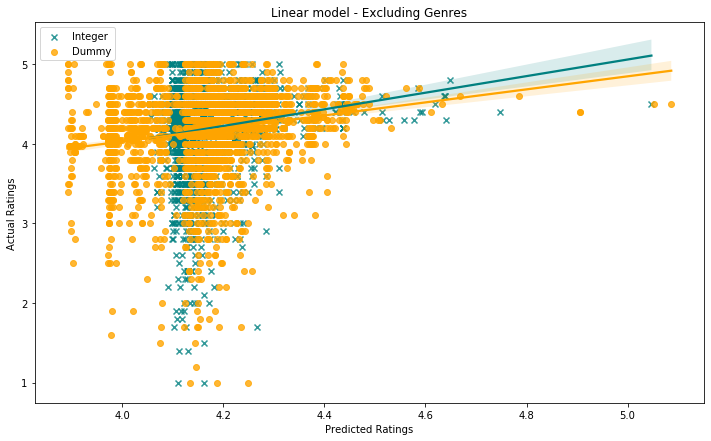

In [199]:
plt.figure(figsize=(12,7))
sns.regplot(Results,y_test,color='teal', label = 'Integer', marker = 'x')
sns.regplot(Results_d,y_test_d,color='orange',label = 'Dummy')
plt.legend()
plt.title('Linear model - Excluding Genres')
plt.xlabel('Predicted Ratings')
plt.ylabel('Actual Ratings')
plt.show()

In [200]:
print ('Actual mean of population:' + str(y.mean()))
print ('Integer encoding(mean) :' + str(Results.mean()))
print ('Dummy encoding(mean) :'+ str(Results_d.mean()))
print ('Integer encoding(std) :' + str(Results.std()))
print ('Dummy encoding(std) :'+ str(Results_d.std()))

Actual mean of population:4.16956967443954
Integer encoding(mean) :4.162638973444019
Dummy encoding(mean) :4.16857034299298
Integer encoding(std) :0.06662643405703195
Dummy encoding(std) :0.1179609090602305


If we look at the actual mean of the predictive results, both are approximately the same, however the dummy encoded results have a much larger standard deviation as compared to the integer encoded model.

Next is looking at the linear model including the genre label as a numeric value.

 Linear model - Including Genres

In [201]:
#Including genre label

#Integer encoding
X = df.drop(labels = ['Category','Rating','Genres'],axis = 1)
y = df.Rating
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)
model = LinearRegression()
model.fit(X_train,y_train)
Results = model.predict(X_test)

resultsdf = resultsdf.append(Evaluationmatrix_dict(y_test,Results, name = 'Linear(inc Genre) - Integer'),ignore_index = True)

#dummy encoding

X_d = df2.drop(labels = ['Rating','Genres','Category_c'],axis = 1)
y_d = df2.Rating
X_train_d, X_test_d, y_train_d, y_test_d = train_test_split(X_d, y_d, test_size=0.30)
model_d = LinearRegression()
model_d.fit(X_train_d,y_train_d)
Results_d = model_d.predict(X_test_d)

resultsdf = resultsdf.append(Evaluationmatrix_dict(y_test_d,Results_d, name = 'Linear(inc Genre) - Dummy'),ignore_index = True)


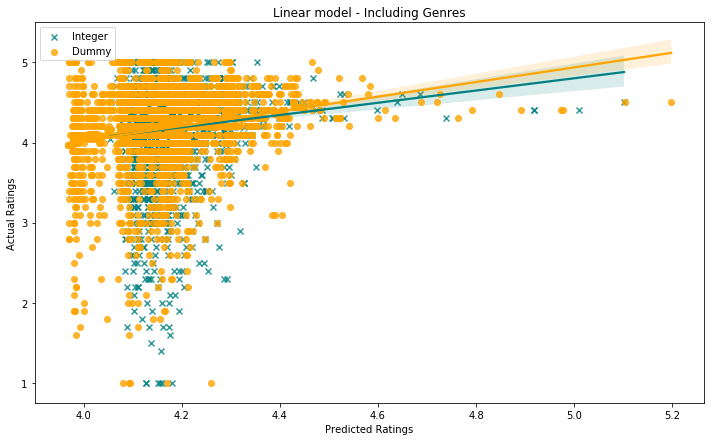

In [202]:
plt.figure(figsize=(12,7))
sns.regplot(Results,y_test,color='teal', label = 'Integer', marker = 'x')
sns.regplot(Results_d,y_test_d,color='orange',label = 'Dummy')
plt.legend()
plt.title('Linear model - Including Genres')
plt.xlabel('Predicted Ratings')
plt.ylabel('Actual Ratings')
plt.show()

In [203]:
print ('Integer encoding(mean) :' + str(Results.mean()))
print ('Dummy encoding(mean) :'+ str(Results_d.mean()))
print ('Integer encoding(std) :' + str(Results.std()))
print ('Dummy encoding(std) :'+ str(Results_d.std()))

Integer encoding(mean) :4.170282525385838
Dummy encoding(mean) :4.165397990459555
Integer encoding(std) :0.07240067026875967
Dummy encoding(std) :0.11690518291919645


When including the genre data, we see a slight difference in the mean between the integer and dummy encoded linear models. The dummy encoded model's std is still higher than the integer encoded model.

What's striking to me personally is that the dummy encoded regression line in the scatterplot is now flatter than the integer encoded regression line, which might suggest a "worse" outcome, given that usually you would want your regression's beta value to be closer to 1 than to 0.

RFR model - excluding Genres

In [204]:
from sklearn.ensemble import RandomForestRegressor

#Integer encoding
X = df.drop(labels = ['Category','Rating','Genres','Genres_c'],axis = 1)
y = df.Rating
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)
model3 = RandomForestRegressor()
model3.fit(X_train,y_train)
Results3 = model3.predict(X_test)

#evaluation
resultsdf = resultsdf.append(Evaluationmatrix_dict(y_test,Results3, name = 'RFR - Integer'),ignore_index = True)

#dummy encoding

X_d = df2.drop(labels = ['Rating','Genres','Category_c','Genres_c'],axis = 1)
y_d = df2.Rating
X_train_d, X_test_d, y_train_d, y_test_d = train_test_split(X_d, y_d, test_size=0.30)
model3_d = RandomForestRegressor()
model3_d.fit(X_train_d,y_train_d)
Results3_d = model3_d.predict(X_test_d)

#evaluation
resultsdf = resultsdf.append(Evaluationmatrix_dict(y_test,Results3_d, name = 'RFR - Dummy'),ignore_index = True)


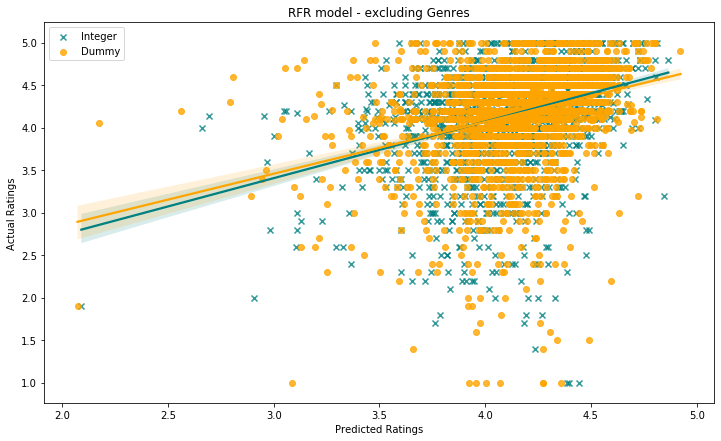

In [205]:
plt.figure(figsize=(12,7))
sns.regplot(Results3,y_test,color='teal', label = 'Integer', marker = 'x')
sns.regplot(Results3_d,y_test_d,color='orange',label = 'Dummy')
plt.legend()
plt.title('RFR model - excluding Genres')
plt.xlabel('Predicted Ratings')
plt.ylabel('Actual Ratings')
plt.show()

In [206]:
print ('Integer encoding(mean) :' + str(Results3.mean()))
print ('Dummy encoding(mean) :'+ str(Results3_d.mean()))
print ('Integer encoding(std) :' + str(Results3.std()))
print ('Dummy encoding(std) :'+ str(Results3_d.std()))

Integer encoding(mean) :4.152981109591734
Dummy encoding(mean) :4.174352232947233
Integer encoding(std) :0.26588219843158667
Dummy encoding(std) :0.27079630512489805


At first glance, I would say that the RFR model produced the best predictive results, just looking at the scatter graph plotted. Overall both models, the integer and the dummy encoded models seem to perform relatively similar, although the dummy encoded model has a higher overall predicted mean.

<Figure size 1008x720 with 0 Axes>

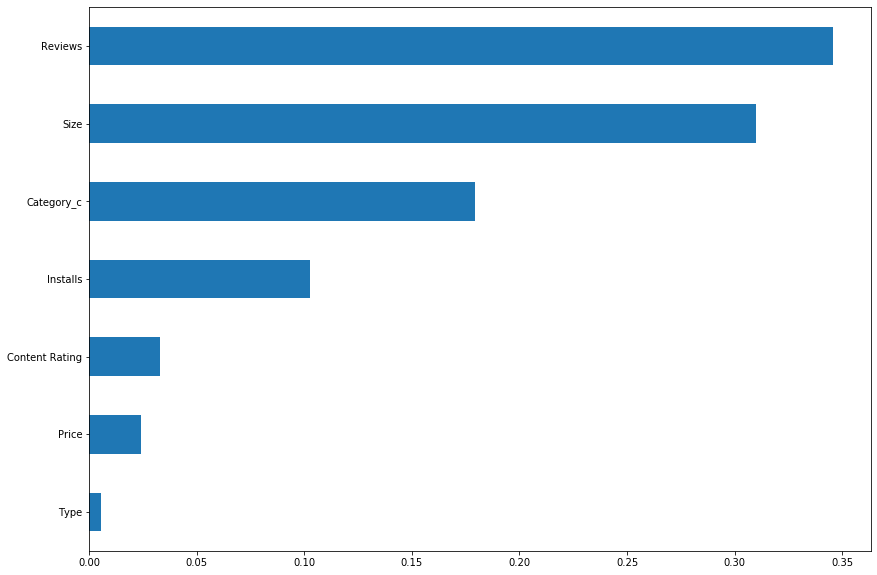

In [207]:
#for integer
Feat_impt = {}
for col,feat in zip(X.columns,model3.feature_importances_):
    Feat_impt[col] = feat

Feat_impt_df = pd.DataFrame.from_dict(Feat_impt,orient = 'index')
Feat_impt_df.sort_values(by = 0, inplace = True)
Feat_impt_df.rename(index = str, columns = {0:'Pct'},inplace = True)

plt.figure(figsize= (14,10))
Feat_impt_df.plot(kind = 'barh',figsize= (14,10),legend = False)
plt.show()

If we look at what influences the ratings, the top 4 being reviews, size, category, and number of installs seem to have the highest influence. This is quite an interesting observation, while also rationalizable.

<Figure size 1008x720 with 0 Axes>

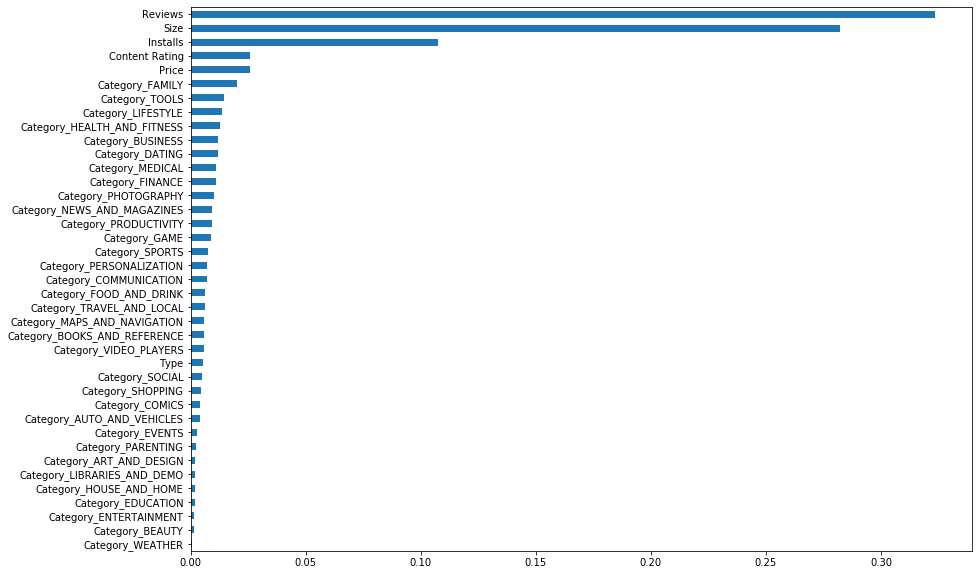

In [208]:
#for dummy
Feat_impt_d = {}
for col,feat in zip(X_d.columns,model3_d.feature_importances_):
    Feat_impt_d[col] = feat

Feat_impt_df_d = pd.DataFrame.from_dict(Feat_impt_d,orient = 'index')
Feat_impt_df_d.sort_values(by = 0, inplace = True)
Feat_impt_df_d.rename(index = str, columns = {0:'Pct'},inplace = True)

plt.figure(figsize= (14,10))
Feat_impt_df_d.plot(kind = 'barh',figsize= (14,10),legend = False)
plt.show()

Looking at the breakdown even further, it would seem that indeed Reviews, size and number of install remain as a significant contributer to the predictiveness of app ratings. What's interesting to me is that how the Family category of apps have such a high level of predictiveness in terms of ratings, as say compared to the and Entertainment category.

RFR model - including Genres

In [209]:
#Including Genres_C

#Integer encoding
X = df.drop(labels = ['Category','Rating','Genres'],axis = 1)
y = df.Rating
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)
model3a = RandomForestRegressor()
model3a.fit(X_train,y_train)
Results3a = model3a.predict(X_test)

#evaluation
resultsdf = resultsdf.append(Evaluationmatrix_dict(y_test,Results3a, name = 'RFR(inc Genres) - Integer'),ignore_index = True)

#dummy encoding

X_d = df2.drop(labels = ['Rating','Genres','Category_c'],axis = 1)
y_d = df2.Rating
X_train_d, X_test_d, y_train_d, y_test_d = train_test_split(X_d, y_d, test_size=0.30)
model3a_d = RandomForestRegressor()
model3a_d.fit(X_train_d,y_train_d)
Results3a_d = model3a_d.predict(X_test_d)

#evaluation
resultsdf = resultsdf.append(Evaluationmatrix_dict(y_test,Results3a_d, name = 'RFR(inc Genres) - Dummy'),ignore_index = True)

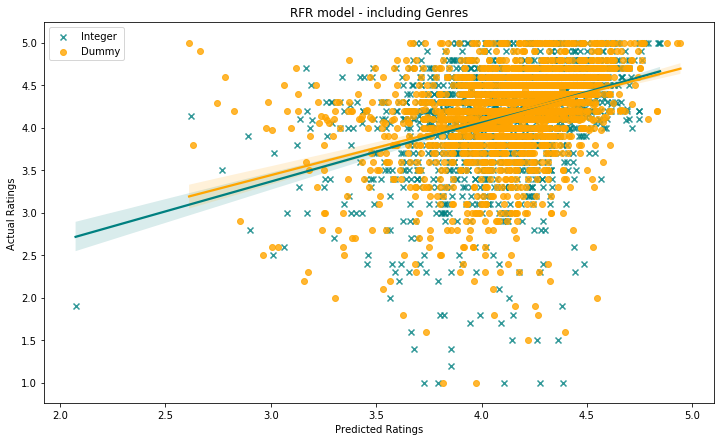

In [210]:
plt.figure(figsize=(12,7))
sns.regplot(Results3a,y_test,color='teal', label = 'Integer', marker = 'x')
sns.regplot(Results3a_d,y_test_d,color='orange',label = 'Dummy')
plt.legend()
plt.title('RFR model - including Genres')
plt.xlabel('Predicted Ratings')
plt.ylabel('Actual Ratings')
plt.show()

In [211]:
print ('Integer encoding(mean) :' + str(Results3.mean()))
print ('Dummy encoding(mean) :'+ str(Results3_d.mean()))
print ('Integer encoding(std) :' + str(Results3.std()))
print ('Dummy encoding(std) :'+ str(Results3_d.std()))

Integer encoding(mean) :4.152981109591734
Dummy encoding(mean) :4.174352232947233
Integer encoding(std) :0.26588219843158667
Dummy encoding(std) :0.27079630512489805


Again with the inclusion of the genre variable, the results do not seem to defer significantly as compared to the previous results.

<Figure size 1008x720 with 0 Axes>

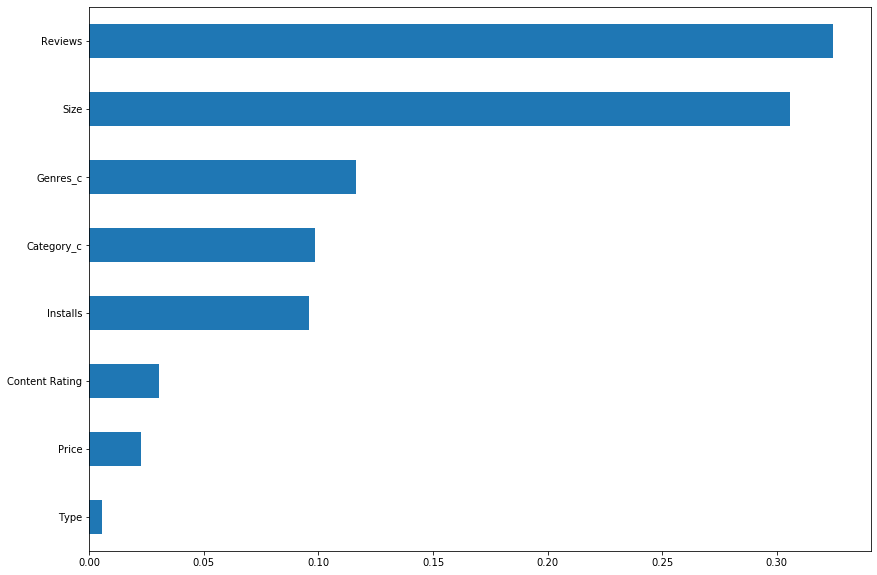

In [212]:
#for integer
Feat_impt = {}
for col,feat in zip(X.columns,model3a.feature_importances_):
    Feat_impt[col] = feat

Feat_impt_df = pd.DataFrame.from_dict(Feat_impt,orient = 'index')
Feat_impt_df.sort_values(by = 0, inplace = True)
Feat_impt_df.rename(index = str, columns = {0:'Pct'},inplace = True)

plt.figure(figsize= (14,10))
Feat_impt_df.plot(kind = 'barh',figsize= (14,10),legend = False)
plt.show()

From the results, it would seem that the genre section actually plays an important part in the decision tree making. Yet the exclusion of it dosent seem to significantly impact results. This to me is quite interesting.

<Figure size 1008x720 with 0 Axes>

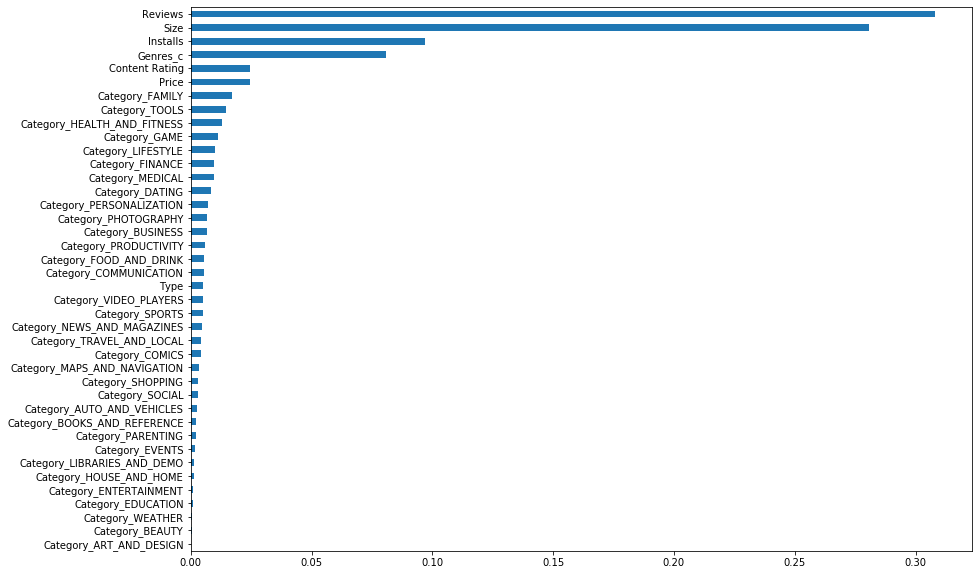

In [213]:
#for dummy
Feat_impt_d = {}
for col,feat in zip(X_d.columns,model3a_d.feature_importances_):
    Feat_impt_d[col] = feat

Feat_impt_df_d = pd.DataFrame.from_dict(Feat_impt_d,orient = 'index')
Feat_impt_df_d.sort_values(by = 0, inplace = True)
Feat_impt_df_d.rename(index = str, columns = {0:'Pct'},inplace = True)

plt.figure(figsize= (14,10))
Feat_impt_df_d.plot(kind = 'barh',figsize= (14,10),legend = False)
plt.show()

In [214]:
resultsdf

,Series Name,Mean Squared Error,Mean Absolute Error,Mean Squared Log Error
0,Linear - Integer,0.229076,0.326036,0.010942
1,Linear - Dummy,0.245207,0.328406,0.0121053
2,Linear(inc Genre) - Integer,0.263655,0.341314,0.0132954
3,Linear(inc Genre) - Dummy,0.245221,0.33017,0.0121378
4,RFR - Integer,0.229047,0.320341,0.0110946
5,RFR - Dummy,0.329303,0.405256,0.0153108
6,RFR(inc Genres) - Integer,0.22496,0.312631,0.0114448
7,RFR(inc Genres) - Dummy,0.326251,0.406236,0.0156595


In [ ]:
resultsdf.set_index('Series Name', inplace = True)

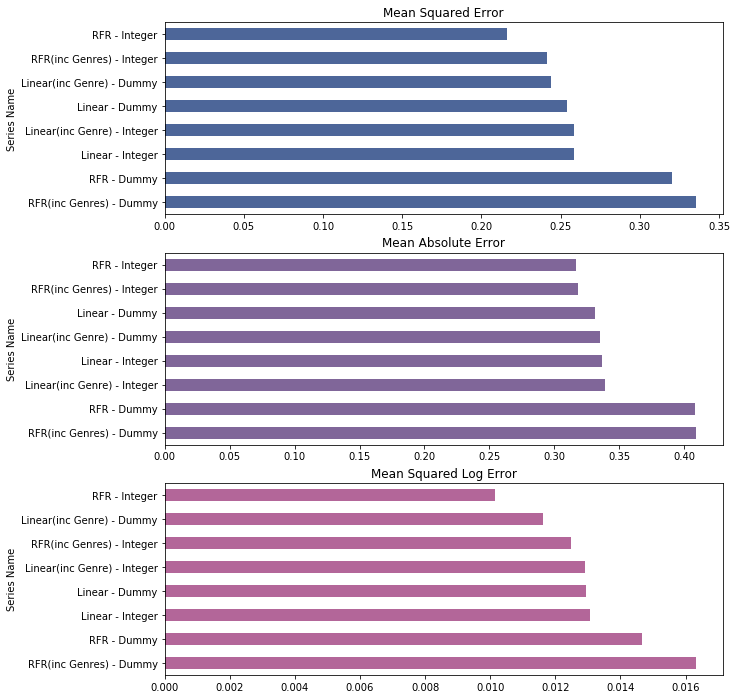

In [172]:

plt.figure(figsize = (10,12))
plt.subplot(3,1,1)
resultsdf['Mean Squared Error'].sort_values(ascending = False).plot(kind = 'barh',color=(0.3, 0.4, 0.6, 1), title = 'Mean Squared Error')
plt.subplot(3,1,2)
resultsdf['Mean Absolute Error'].sort_values(ascending = False).plot(kind = 'barh',color=(0.5, 0.4, 0.6, 1), title = 'Mean Absolute Error')
plt.subplot(3,1,3)
resultsdf['Mean Squared Log Error'].sort_values(ascending = False).plot(kind = 'barh',color=(0.7, 0.4, 0.6, 1), title = 'Mean Squared Log Error')
plt.show()

Finally, looking at the results, it is not easy to conclude which model has the best predictive accuracy and lowest error term. Using this round of data as a basis, the integer encoded RFR including Genres has the lowest overall error rates, followed by the integer encoded Linear model excluding Genres . Yet, all models seem to be very close in terms of it's error term, so this result is likely to change.

What is very surprising to me is how the RFR dummy model has such a significantly more error term compared to all the other models, even though on the surface it seemed to perform very similarly to the RFR integer model.

